Given soil and climate conditions, is the most suitable crop a cereal, fruit, or legume?

1. N - ratio of Nitrogen content in soil
2. P - ratio of Phosphorous content in soil
3. K - ratio of Potassium content in soil
4. temperature - temperature in degree Celsius
5. humidity - relative humidity in %
6. ph - ph value of the soil
7. rainfall - rainfall in mm

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

In [3]:
crop = pd.read_csv("https://raw.githubusercontent.com/izaan-khudadad/Project-1-Data-Mining/refs/heads/main/Crop_recommendation.csv", na_values=['?'])
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Map each crop to a broader group

In [ ]:
crop_to_group = {
    # Cereals
    "rice": "cereal",
    "maize": "cereal",

    # Legumes
    "blackgram": "legume",
    "chickpea": "legume",
    "kidneybeans": "legume",
    "lentil": "legume",
    "mothbeans": "legume",
    "mungbean": "legume",
    "pigeonpeas": "legume",
    
    # Fruits
    "apple": "fruit",
    "banana": "fruit",
    "coconut": "fruit",
    "grapes": "fruit",
    "mango": "fruit",
    "muskmelon": "fruit",
    "orange": "fruit",
    "papaya": "fruit",
    "pomegranate": "fruit",
    "watermelon": "fruit",
}

In [8]:
# Create the grouped target
crop["group"] = crop["label"].map(crop_to_group)

In [9]:
# only keep relevant values
df_grp = crop[crop["group"].isin(["cereal", "fruit", "legume"])].copy() 

In [10]:
# Define features (X) and target (y)
feature_cols = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
X = df_grp[feature_cols]
y = df_grp["group"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
clf = DecisionTreeClassifier(
    max_depth=3,    
    random_state=42
)

In [13]:
# Train
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.942

Classification report:
               precision    recall  f1-score   support

      cereal       0.98      1.00      0.99        40
       fruit       0.91      0.99      0.95       200
      legume       0.99      0.85      0.92       140

    accuracy                           0.94       380
   macro avg       0.96      0.95      0.95       380
weighted avg       0.95      0.94      0.94       380



In [15]:
# features by reduced impurity 
imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature importance:\n", imp)


Feature importance:
 humidity       0.531498
N              0.151250
P              0.146519
rainfall       0.088136
K              0.082597
temperature    0.000000
ph             0.000000
dtype: float64


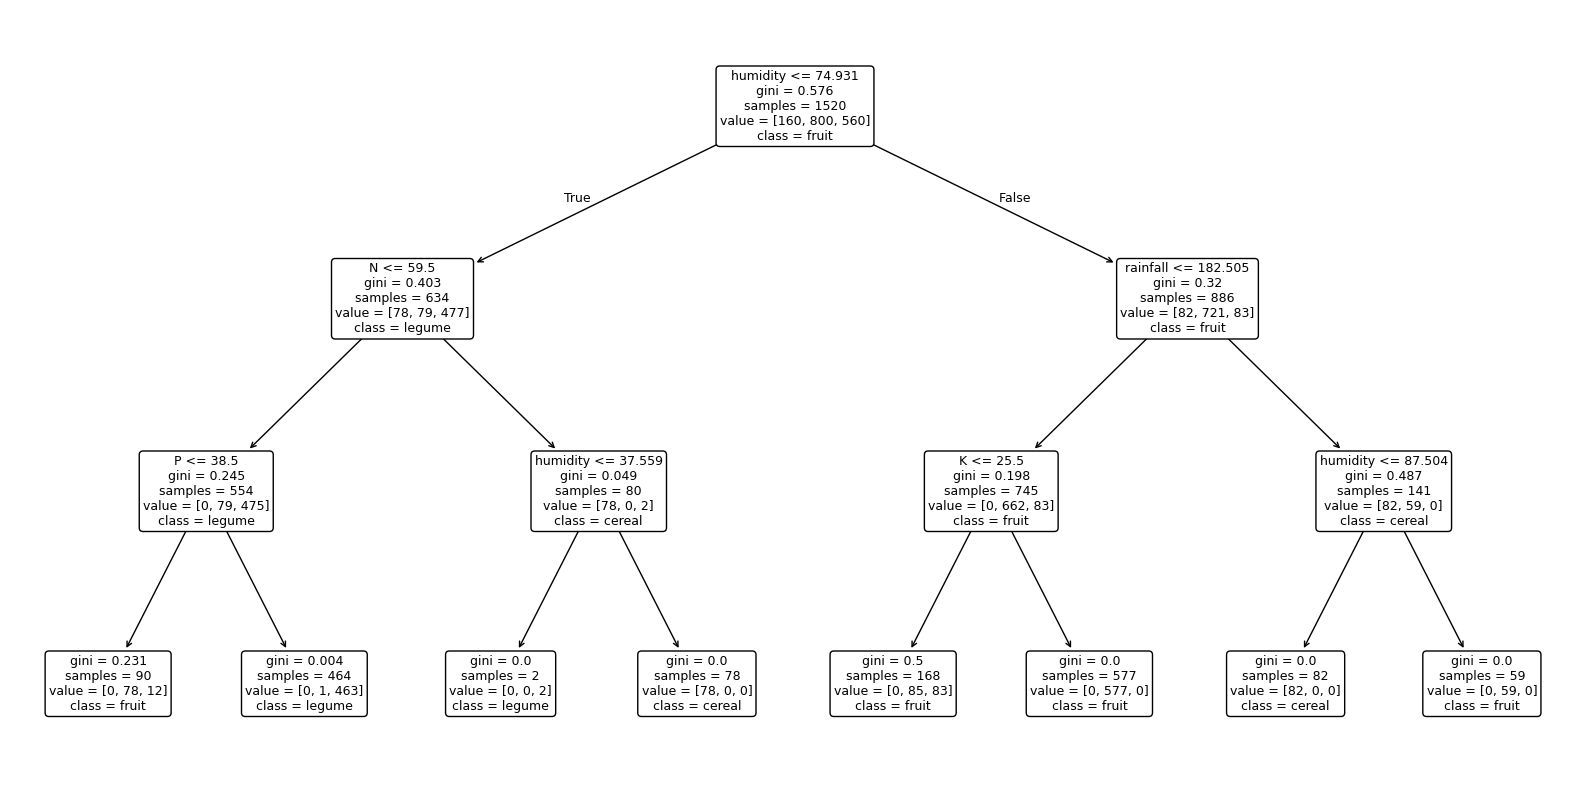

In [16]:
plt.figure(figsize=(16, 8))
plot_tree(
    clf,
    feature_names=list(X.columns),
    class_names=clf.classes_,
    rounded=True,      
    filled=False,     
    fontsize=9
)
plt.tight_layout()
plt.show()

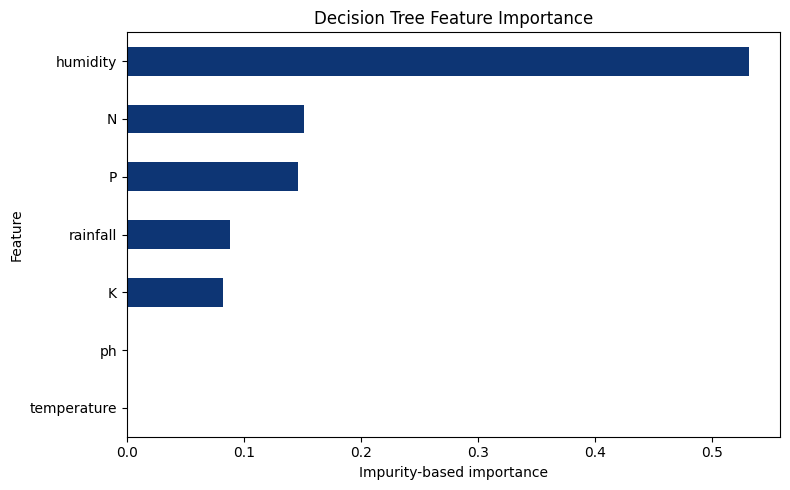

In [25]:
imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(8,5))
imp.plot(kind="barh", color= "#0D3574")  
plt.xlabel("Impurity-based importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()

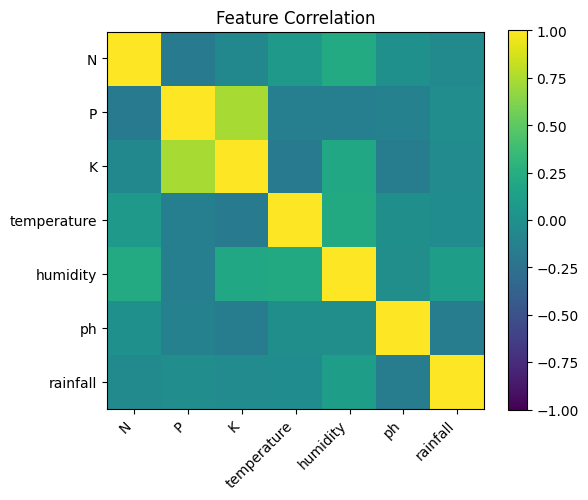

In [18]:
corr = X.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, vmin=-1, vmax=1)
plt.xticks(range(len(X.columns)), X.columns, rotation=45, ha="right")
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

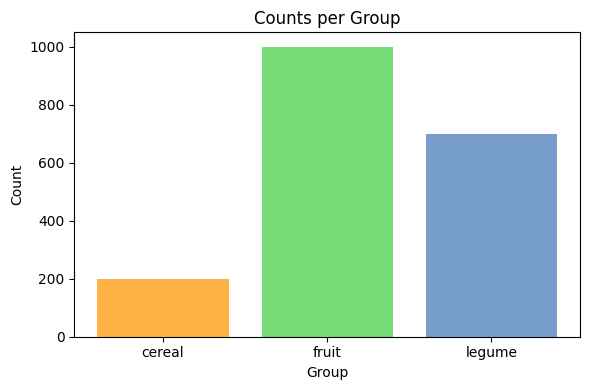

In [22]:
counts = df_grp["group"].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=["#FFB347", "#77DD77", "#779ECB"])
plt.title("Counts per Group")
plt.xlabel("Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()